In [61]:
import os

In [62]:
import pandas as pd

In [63]:
raw_Sdf = pd.read_csv('survey_results_public.csv')
raw_Sdf.head(3)


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


In [64]:
raw_Sdf.shape


(64461, 61)

In [65]:
raw_Sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [66]:
raw_Sdf.isna().sum()

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

In [67]:
raw_scdf = pd.read_csv('survey_results_schema.csv', index_col='Column').QuestionText
raw_scdf

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [68]:
raw_scdf['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

### Data Preparation & Cleaning

In [69]:
raw_Sdf.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4


In [70]:
raw_Sdf.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [71]:
req_columns = [
    #Demographics
    'Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor',
#Programming experience
'Hobbyist', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck',
#Employement
'Employment', 'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime', 'NEWEdImpt'
]

In [72]:
len(req_columns)

20

In [73]:
survey_df = raw_Sdf[req_columns].copy()
#survey_df.shape
survey_df.head(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important


In [74]:
schema = raw_scdf[req_columns].copy()

In [75]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [76]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [77]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [78]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [79]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [80]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [81]:
survey_df.loc[61308, 'WorkWeekHrs'] = 168
survey_df.loc[61756, 'WorkWeekHrs'] = 160
survey_df.loc[54685, 'WorkWeekHrs'] = 168
survey_df.loc[58826, 'WorkWeekHrs'] = 168
survey_df.loc[59351, 'WorkWeekHrs'] = 168
survey_df.loc[59994, 'WorkWeekHrs'] = 168

In [82]:
surveydf = survey_df

In [83]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [84]:
import numpy as np

In [85]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [86]:
survey_df.shape

(64312, 20)

In [87]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64312 entries, 0 to 59994
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 63606 non-null  object 
 1   Age                     45068 non-null  float64
 2   Gender                  50115 non-null  object 
 3   EdLevel                 56981 non-null  object 
 4   UndergradMajor          50619 non-null  object 
 5   Hobbyist                63950 non-null  object 
 6   Age1stCode              57027 non-null  float64
 7   YearsCode               56339 non-null  float64
 8   YearsCodePro            43794 non-null  float64
 9   LanguageWorkedWith      56932 non-null  object 
 10  LanguageDesireNextYear  53688 non-null  object 
 11  NEWLearn                55730 non-null  object 
 12  NEWStuck                54537 non-null  object 
 13  Employment              63394 non-null  object 
 14  DevType                 48983 non-null

In [88]:
#Filling up all the NaN using the forward fill.

survey_df['Age'] = survey_df['Age'].fillna(method='ffill')
survey_df['Age'] = survey_df['Age'].fillna(method='bfill')
survey_df['Age1stCode'] = survey_df['Age1stCode'].fillna(method='ffill')
survey_df['YearsCode'] = survey_df['YearsCode'].fillna(method='ffill')
survey_df['YearsCodePro'] = survey_df['YearsCodePro'].fillna(method='ffill')
survey_df['WorkWeekHrs'] = survey_df['WorkWeekHrs'].fillna(method='ffill')

In [89]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64312 entries, 0 to 59994
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 63606 non-null  object 
 1   Age                     64312 non-null  float64
 2   Gender                  50115 non-null  object 
 3   EdLevel                 56981 non-null  object 
 4   UndergradMajor          50619 non-null  object 
 5   Hobbyist                63950 non-null  object 
 6   Age1stCode              64312 non-null  float64
 7   YearsCode               64312 non-null  float64
 8   YearsCodePro            64312 non-null  float64
 9   LanguageWorkedWith      56932 non-null  object 
 10  LanguageDesireNextYear  53688 non-null  object 
 11  NEWLearn                55730 non-null  object 
 12  NEWStuck                54537 non-null  object 
 13  Employment              63394 non-null  object 
 14  DevType                 48983 non-null

In [90]:
survey_df.isna().sum()

Country                     706
Age                           0
Gender                    14197
EdLevel                    7331
UndergradMajor            13693
Hobbyist                    362
Age1stCode                    0
YearsCode                     0
YearsCodePro                  0
LanguageWorkedWith         7380
LanguageDesireNextYear    10624
NEWLearn                   8582
NEWStuck                   9775
Employment                  918
DevType                   15329
WorkWeekHrs                   0
JobSat                    19477
JobFactors                15371
NEWOvertime               21436
NEWEdImpt                 16220
dtype: int64

In [91]:
survey_df.head(1)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important


## Exploratory and Visualization Analysis

In [92]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

In [93]:
schema.Country

'Where do you live?'

In [94]:
survey_df.Country.nunique()

183

In [95]:
survey_df.Country.value_counts()

United States       12371
India                8364
United Kingdom       3881
Germany              3864
Canada               2175
                    ...  
Kiribati                1
Marshall Islands        1
Grenada                 1
Mali                    1
Fiji                    1
Name: Country, Length: 183, dtype: int64

In [96]:
top_country = survey_df.Country.value_counts().head(20)
top_country

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Turkey                  771
Israel                  649
Switzerland             628
Romania                 596
Bangladesh              595
Name: Country, dtype: int64

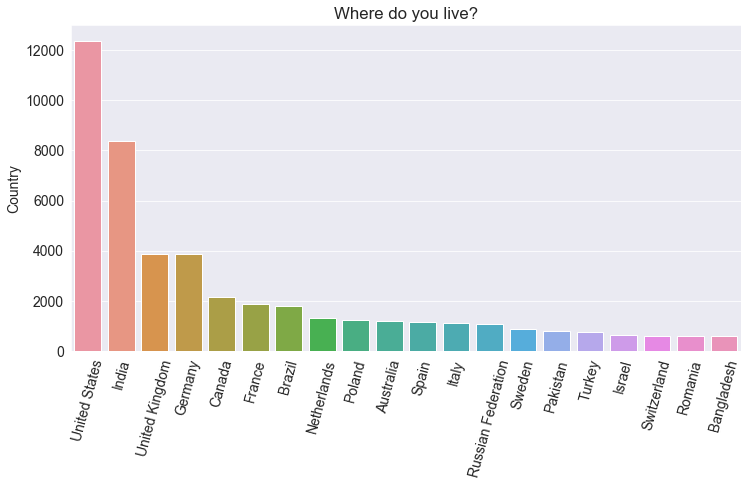

In [97]:
plt.figure(figsize = (12, 6))
plt.xticks(rotation = 75)
plt.title(schema.Country)
sns.barplot(top_country.index, top_country);

## Age Distribution

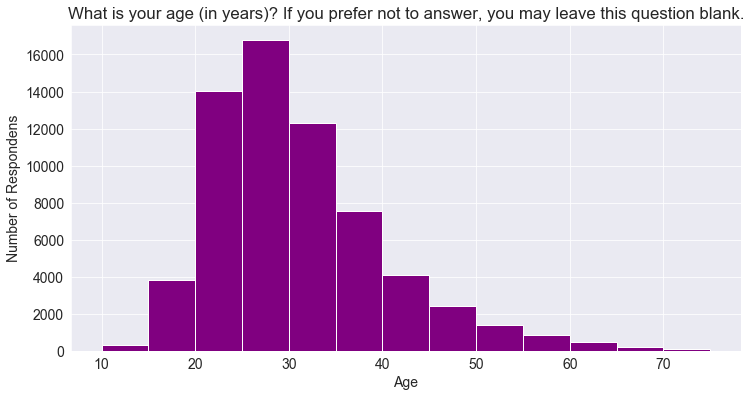

In [99]:
plt.figure(figsize = (12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of Respondens')

plt.hist(survey_df.Age, bins=np.arange(10, 80, 5), color='purple');

## Gender Distribution

In [100]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [107]:
gender_count = survey_df.Gender.value_counts()
gender_count

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

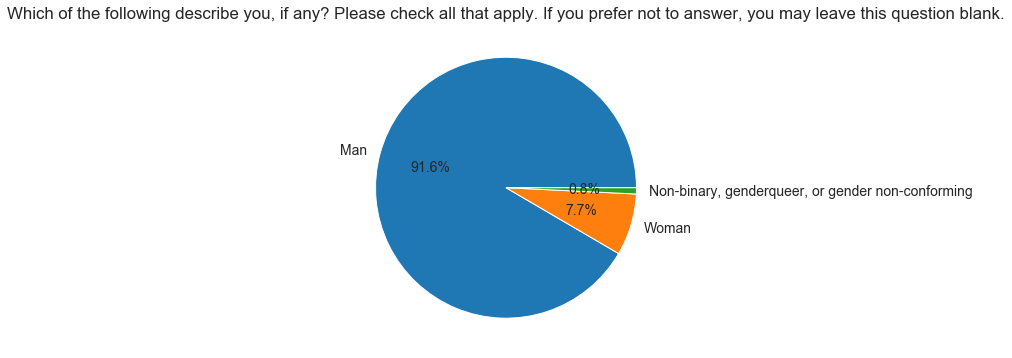

In [108]:
plt.figure(figsize=(12, 6))
plt.title(schema.Gender)
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%');

## Education Level Distribution

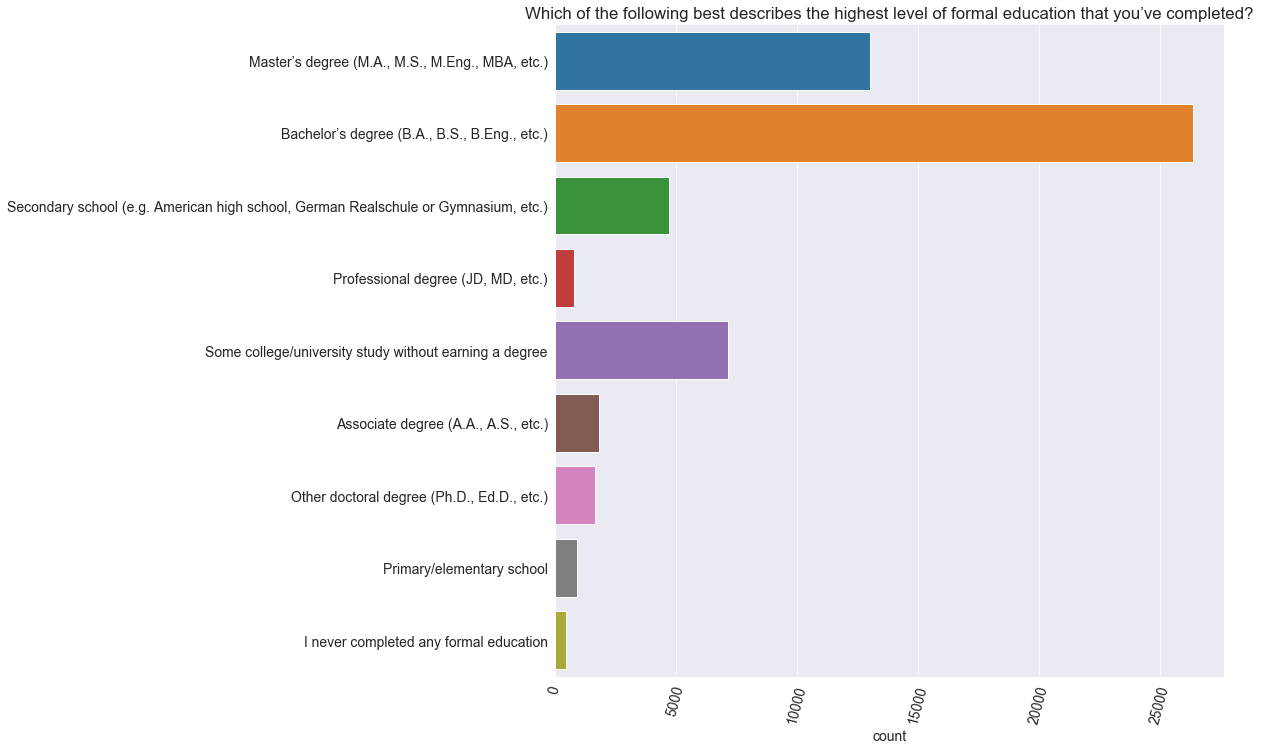

In [111]:
plt.figure(figsize=(12, 12))
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

#### Digging deep into the education, we will like to know more about the background education.

In [112]:
schema.UndergradMajor

'What was your primary field of study?'

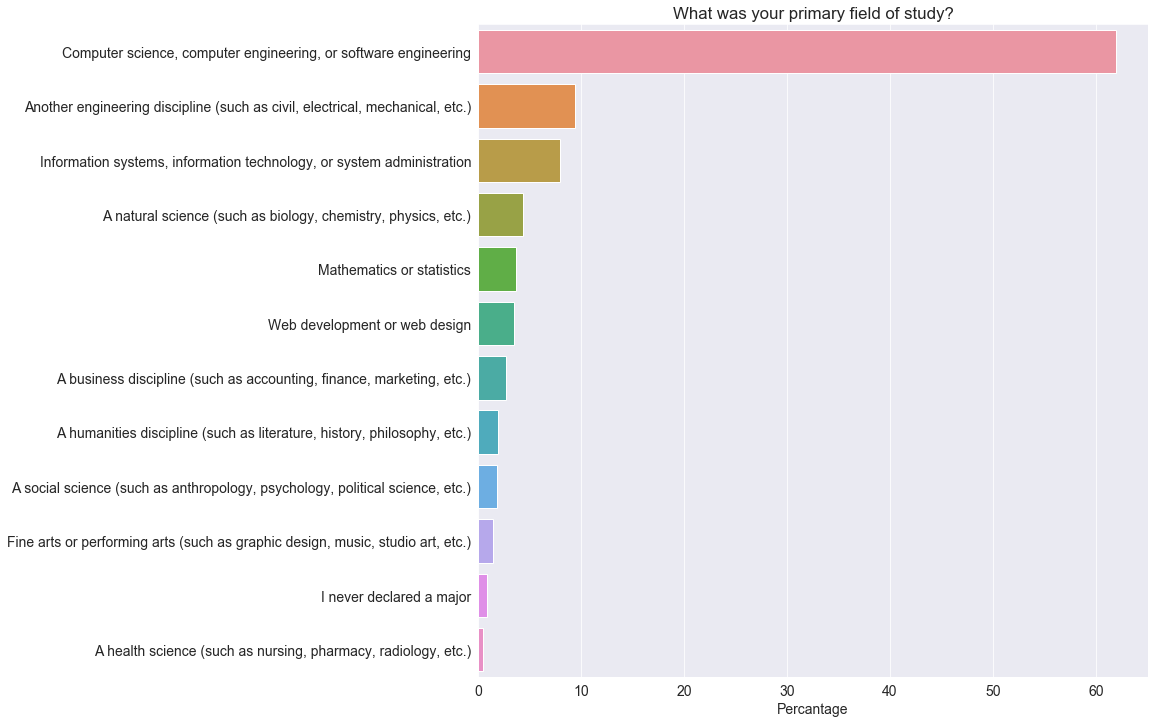

In [115]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

plt.figure(figsize=(12, 12))
sns.barplot(undergrad_pct, undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None)
plt.xlabel('Percantage');

### Employment Distribution
Freelancing or contract work is a common choice among programmer, so it would be inteesting to compare the breakdown between full time, part time & freelance work. Let's visualize the data from Employment column.

In [116]:
schema.Employment

'Which of the following best describes your current employment status?'

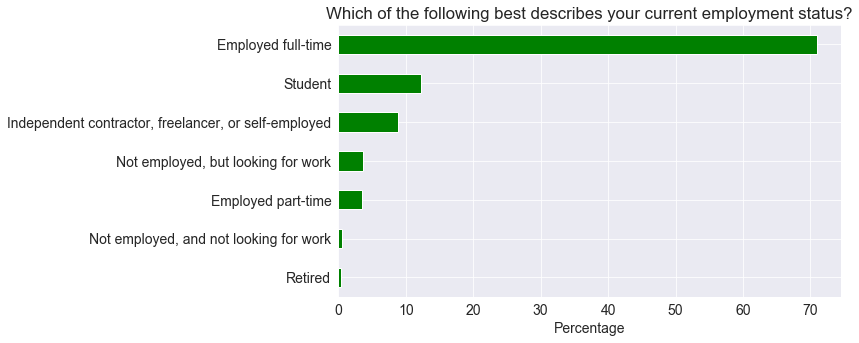

In [118]:
(survey_df.Employment.value_counts(normalize=True, ascending=True) * 100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

In [119]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [121]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                   4396
Developer, back-end                                                                                                                                                                                                     3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                          2214
Developer, back-end;Developer, full-stack                                                                                                                                                                               1465
Developer, front-end                                                                                                

In [123]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # iterative over the column
    for idx, value in col_series[col_series.notnull()].iteritems():
        #break each vale into list of options
        for option in value.split(';'):
            # add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # mark the value in the option column as true
            result_df.at[idx, option] = True
    return result_df[options]

In [124]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61756,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54685,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58826,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59351,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [125]:
dev_type_total = dev_type_df.sum().sort_values(ascending=False)
dev_type_total

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

## Asking and Answering Questions

##### Q1. Which were the most popular programming languages in 2020?

In [127]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [128]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61756,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54685,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58826,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59351,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [130]:
languages_workedon_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_workedon_percentages

JavaScript               59.887735
HTML/CSS                 55.796741
SQL                      48.440415
Python                   38.997388
Java                     35.615437
Bash/Shell/PowerShell    29.237156
C#                       27.800410
PHP                      23.127877
TypeScript               22.459261
C++                      21.112701
C                        19.234358
Go                        7.757495
Kotlin                    6.886740
Ruby                      6.229009
Assembly                  5.446884
VBA                       5.394017
Swift                     5.226085
R                         5.064374
Rust                      4.498383
Objective-C               3.602749
Dart                      3.517229
Scala                     3.150267
Perl                      2.756873
Haskell                   1.861239
Julia                     0.782125
dtype: float64

Text(0.5, 0, 'Count')

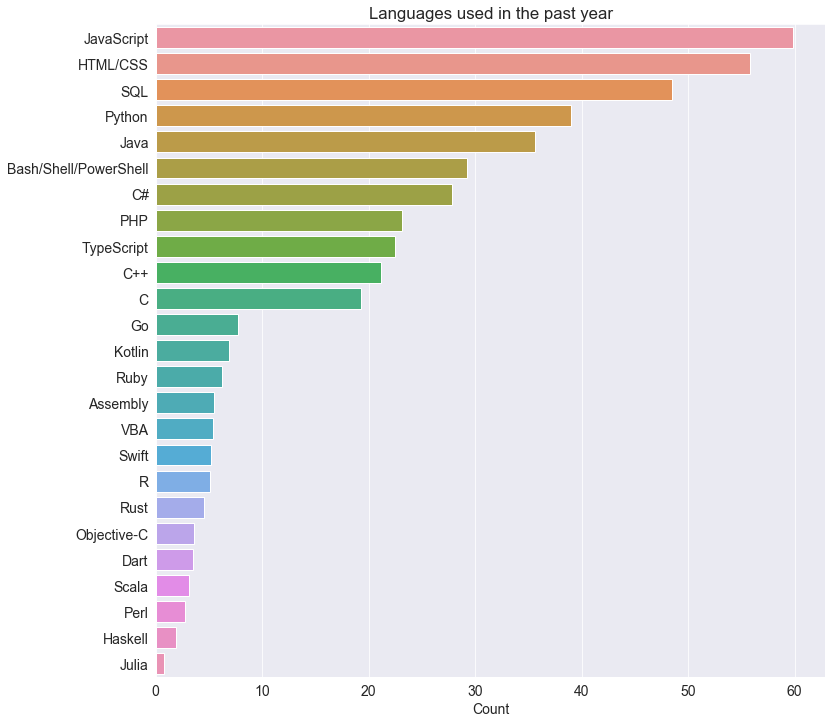

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(languages_workedon_percentages, languages_workedon_percentages.index)
plt.title('Languages used in the past year');
plt.xlabel('Count')